In [ ]:
# Data exploration
n = 9
X = np.load('Datasets/kryptonite-%s-X.npy'%(n))
y = np.load('Datasets/kryptonite-%s-y.npy'%(n))

# Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Number of points
num_points = X.shape[0]
print("Number of data points:", num_points)

# Number of features (dimensions)
num_features = X.shape[1]
print("Number of features (dimensions):", num_features)

# Unique classes and their counts
unique_classes, class_counts = np.unique(y, return_counts=True)
print("Classes and their counts:", dict(zip(unique_classes, class_counts)))

Shape of X: (18000, 9)
Shape of y: (18000,)
Number of data points: 18000
Number of features (dimensions): 9
Classes and their counts: {np.int64(0): np.int64(8964), np.int64(1): np.int64(9036)}


In [15]:
# Class distribution
import numpy as np

# Load target variable
n = 9
y = np.load('Datasets/kryptonite-%s-y.npy' % n)

# Check class distribution
unique_classes, class_counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique_classes, class_counts))
print("Class distribution:", class_distribution)

Class distribution: {np.int64(0): np.int64(8964), np.int64(1): np.int64(9036)}


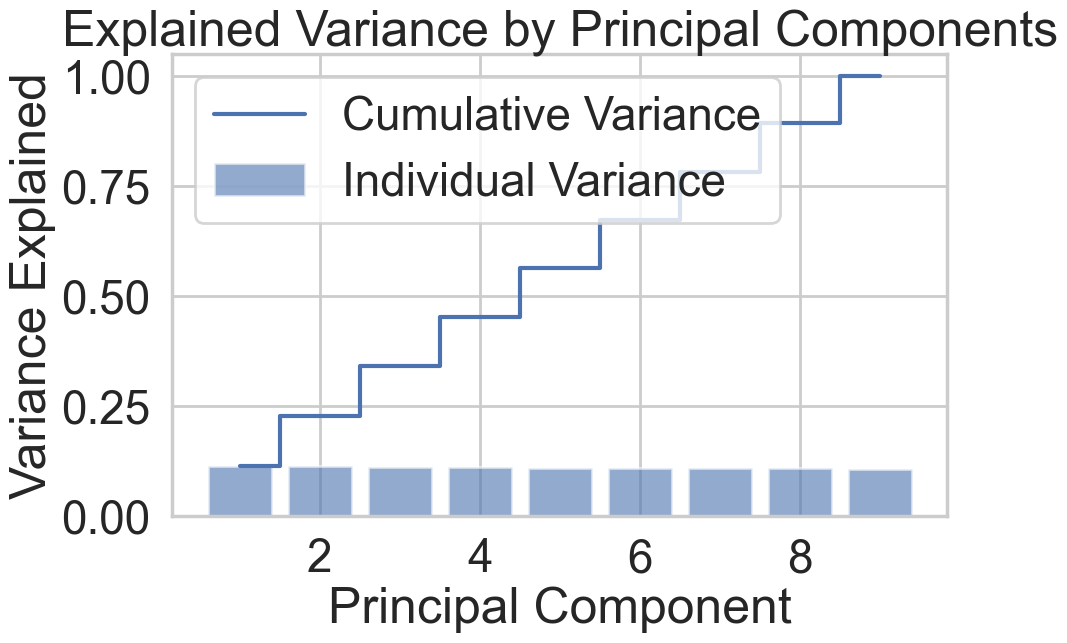

Principal Component 1: 0.1147 variance explained
Principal Component 2: 0.1136 variance explained
Principal Component 3: 0.1128 variance explained
Principal Component 4: 0.1121 variance explained
Principal Component 5: 0.1106 variance explained
Principal Component 6: 0.1103 variance explained
Principal Component 7: 0.1098 variance explained
Principal Component 8: 0.1092 variance explained
Principal Component 9: 0.1070 variance explained


In [22]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
n = 9
X = np.load('Datasets/kryptonite-%s-X.npy' % n)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Individual Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

# Print explained variance for each component
for i, variance in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {variance:.4f} variance explained")

In [2]:
n_values = [9,12,15]

p_values = [1,2,3,4,5,6,7]

presolved_acc_by_n = [[0.5033918128654971, 0.516140350877193, 0.5139181286549708, 0.5250292397660818, 0.5383625730994152, 0.5638596491228071, 0.5913450292397661], 
                      [0.5016666666666667, 0.496875, 0.5058333333333334, 0.5108333333333334, 0.51375, 0.5241666666666667, 0.5333333333333333],
                     [0.49773333333333336, 0.5005333333333334, 0.504, 0.4978666666666667, 0.5038666666666667, 0.5157333333333334, 0.5241666666666667]]

presolved_feat_by_n = [[10, 55, 220, 715, 2002, 5005, 11440], 
                       [13, 91, 455, 1820, 6188, 18564, 50388],
                       [16, 136, 816, 3876, 15504, 54264, 170544]]


In [8]:
# Regularisation
def run_poly_logistic_regression_with_l2_reg(n, e):

    X = np.load('Datasets/kryptonite-%s-X.npy'%(n))
    y = np.load('Datasets/kryptonite-%s-y.npy'%(n))

    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)  # 60% training
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

    # Create polynomial features (set degree as desired)
    degree = e
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    print(X_train_poly.shape)
    features = X_train_poly.shape[-1]
    print("Created features")

    # Initialize and fit logistic regression
    logreg = LogisticRegression(penalty="l2", max_iter=500, solver='sag', C=0.85)
    logreg.fit(X_train_poly, y_train)
    print("Fit Model")

    # Evaluate on the validation set
    y_val_pred = logreg.predict(X_val_poly)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Evaluate on the test set
    y_test_pred = logreg.predict(X_test_poly)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy, features

In [10]:
acc, feat = run_poly_logistic_regression_with_l2_reg(9, 3)
print(acc)

(7200, 220)
Created features
Fit Model
Validation Accuracy: 0.5050
Test Accuracy: 0.5193
0.5192592592592593


In [ ]:
# try gradient boosting machine
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

def run_gbm(n):

    X = np.load('Datasets/kryptonite-%s-X.npy'%(n))
    y = np.load('Datasets/kryptonite-%s-y.npy'%(n))

    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)  # 60% training
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test
    
    gbm = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages (trees)
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    max_depth=3,  # Max depth of each tree
    random_state=42  # For reproducibility
    )

    # Train the GBM on the training set
    gbm.fit(X_train, y_train)
    print("Model training complete.")

    # Evaluate on the validation set
    y_val_pred = gbm.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Evaluate on the test set
    y_test_pred = gbm.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy

In [14]:
gbm_accuracy = run_gbm(9)
print(f"Accuracy for Kryptonite-9: {gbm_accuracy}")

Model training complete.
Validation Accuracy: 0.5076
Test Accuracy: 0.5093
Accuracy for Kryptonite-9: 0.5092592592592593


In [37]:
# try xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
def run_xgboost(n):

    X = np.load('Datasets/kryptonite-%s-X.npy'%(n))
    y = np.load('Datasets/kryptonite-%s-y.npy'%(n))

    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)  # 60% training
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

    param_grid = {
        'n_estimators': [100, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 7],
        'min_child_weight': [1, 10],
        'subsample': [0.7, 1],
        'colsample_bytree': [0.7, 1],
        'gamma': [0, 0.5]
    }

    xgb = XGBClassifier(use_label_encoder=False, random_state=42, eval_metric='logloss')

    grid_search = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        cv=5,               # 5-fold cross-validation
        scoring='accuracy', # Evaluate performance with accuracy
        verbose=2,          # Increase verbosity for detailed output
        n_jobs=-1           # Use all available cores
    )


    grid_search.fit(X_train, y_train)
    print("Model training complete.")
    #table for all the results
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df = results_df[['mean_test_score', 'std_test_score', 'params']]
    results_df = results_df.sort_values(by='mean_test_score', ascending=False)

    # Get the best parameters and estimator from grid search
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print(f"Best parameters found: {best_params}")

    y_val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy with best parameters: {val_accuracy:.4f}")

    # Test the best model on the test set
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy with best parameters: {test_accuracy:.4f}")
    print("Grid Search Results (sorted by mean test score):")
    print(results_df)
    return test_accuracy

In [38]:
xgb_accuracy = run_xgboost(9)
print(f"XGB Accuracy for Kryptonite-9: {xgb_accuracy}")

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Model training complete.
Best parameters found: {'colsample_bytree': 0.7, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}
Validation Accuracy with best parameters: 0.4981
Test Accuracy with best parameters: 0.5000
Grid Search Results (sorted by mean test score):
     mean_test_score  std_test_score  \
48          0.520833        0.005860   
95          0.518611        0.012127   
72          0.518472        0.007370   
110         0.518472        0.008329   
18          0.518333        0.013613   
..               ...             ...   
15          0.504722        0.009227   
47          0.504722        0.007485   
79          0.503611        0.006950   
93          0.501111        0.009271   
88          0.497222        0.005486   

                                                params  
48   {'colsample_bytree': 0.7, 'gamma': 0.5, 'learn...  
95   {'colsam

c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# A Thought Experiment
We have now seen that state-of-the-art methodologies like Gradient Boosting Machines and XGBoost fail to classify the Kryptonite-9 dataset effectively. 

Let us return to the simple case of Logistic Regression with Basis Expansion. The question we will now try to answer is if we simplify the dataset to a single feature, rather than 9, how much basis expansion do we need before we successfully classify it?

In [39]:
# test where logistic regression fails
# Load the data
n = 9
X = np.load('Datasets/kryptonite-%s-X.npy' % n)
y = np.load('Datasets/kryptonite-%s-y.npy' % n)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% test

# Standardize the training data for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA and fit it on the training data
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Polynomial degree
degree = 2
poly = PolynomialFeatures(degree=degree)

# Results storage
results = []

# Loop over the number of principal components from 1 to 9
for num_components in range(1, 10):
    # Select the first 'num_components' principal components
    X_train_reduced = X_train_pca[:, :num_components]
    X_test_reduced = X_test_pca[:, :num_components]
    
    # Perform polynomial feature expansion
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    
    # Initialize and train logistic regression model
    logreg = LogisticRegression(max_iter=500, solver='saga', C=1.0, random_state=42)
    logreg.fit(X_train_poly, y_train)
    
    # Evaluate the model on the test set
    y_test_pred = logreg.predict(X_test_poly)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store the result
    results.append((num_components, test_accuracy))
    print(f"Number of Components: {num_components}, Test Accuracy: {test_accuracy:.4f}")

# Convert results to a structured view
import pandas as pd
results_df = pd.DataFrame(results, columns=['Num_Principal_Components', 'Test_Accuracy'])
print("\nExperiment Results:")
print(results_df)

c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Number of Components: 1, Test Accuracy: 0.4928
Number of Components: 2, Test Accuracy: 0.5061
Number of Components: 3, Test Accuracy: 0.4917
Number of Components: 4, Test Accuracy: 0.4981
Number of Components: 5, Test Accuracy: 0.5250
Number of Components: 6, Test Accuracy: 0.5253


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Number of Components: 7, Test Accuracy: 0.5158


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Number of Components: 8, Test Accuracy: 0.5050
Number of Components: 9, Test Accuracy: 0.5031

Experiment Results:
   Num_Principal_Components  Test_Accuracy
0                         1       0.492778
1                         2       0.506111
2                         3       0.491667
3                         4       0.498056
4                         5       0.525000
5                         6       0.525278
6                         7       0.515833
7                         8       0.505000
8                         9       0.503056


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


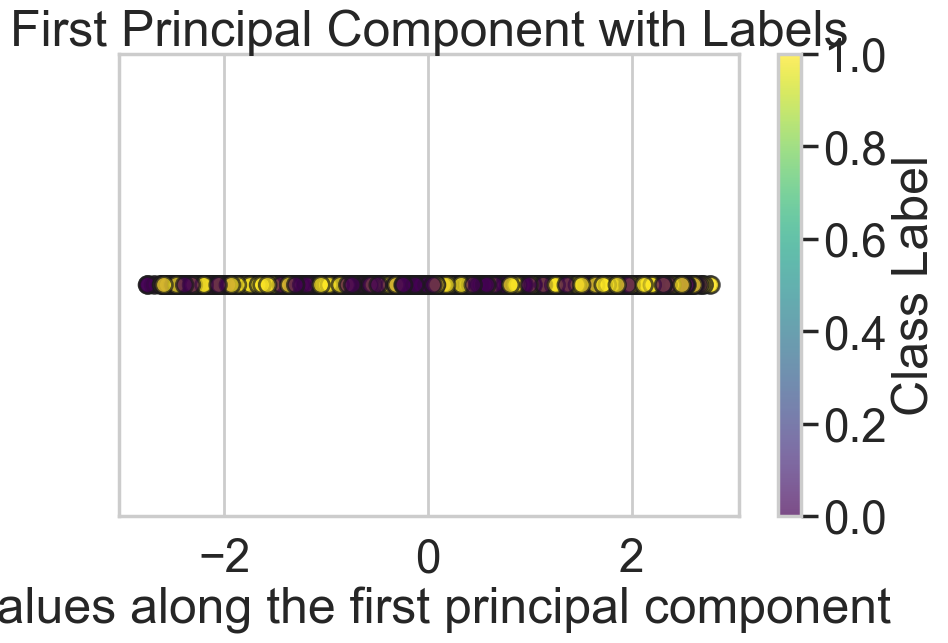

In [44]:
# Standardize the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA and extract the first principal component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)
first_component = X_pca[:, 0]

# Plot the first principal component with colors based on labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(first_component, np.zeros_like(first_component), c=y, cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label="Class Label")
plt.xlabel("Values along the first principal component")
plt.title("First Principal Component with Labels")
plt.yticks([])  # Remove y-ticks as they are not meaningful here
plt.show()

In [47]:
#How much basis expansion required before the first principal component is linearly separable?

n = 9
X = np.load('Datasets/kryptonite-%s-X.npy' % n)
y = np.load('Datasets/kryptonite-%s-y.npy' % n)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% test

# Standardize the data before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to get only the first principal component
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)  # Only first principal component
X_test_pca = pca.transform(X_test_scaled)

# Experiment with different polynomial degrees
results = []

# Loop over polynomial degrees
for degree in range(1, 100):  # Testing degrees from 1 to 5
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_pca)
    X_test_poly = poly.transform(X_test_pca)
    
    # Train logistic regression model
    logreg = LogisticRegression(max_iter=500, solver='saga', C=1.0, random_state=42)
    logreg.fit(X_train_poly, y_train)
    
    # Evaluate the model on the test set
    y_test_pred = logreg.predict(X_test_poly)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store the result
    results.append((degree, test_accuracy))
    print(f"Polynomial Degree: {degree}, Test Accuracy: {test_accuracy:.4f}")

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results, columns=['Polynomial_Degree', 'Test_Accuracy'])
print("\nExperiment Results:")
print(results_df)

Polynomial Degree: 1, Test Accuracy: 0.4989


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 2, Test Accuracy: 0.4928


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 3, Test Accuracy: 0.4897
Polynomial Degree: 4, Test Accuracy: 0.4931
Polynomial Degree: 5, Test Accuracy: 0.5042


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 6, Test Accuracy: 0.5278


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 7, Test Accuracy: 0.4961


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 8, Test Accuracy: 0.4950


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 9, Test Accuracy: 0.5022


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 10, Test Accuracy: 0.5017


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 11, Test Accuracy: 0.4958


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 12, Test Accuracy: 0.4989


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 13, Test Accuracy: 0.4900


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 14, Test Accuracy: 0.4922


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 15, Test Accuracy: 0.5039


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 16, Test Accuracy: 0.4942


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 17, Test Accuracy: 0.5106


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 18, Test Accuracy: 0.4956


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 19, Test Accuracy: 0.5167


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 20, Test Accuracy: 0.5094


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 21, Test Accuracy: 0.5192


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 22, Test Accuracy: 0.5056


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 23, Test Accuracy: 0.5119


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 24, Test Accuracy: 0.5028


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 25, Test Accuracy: 0.5106


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 26, Test Accuracy: 0.4981


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 27, Test Accuracy: 0.5106


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 28, Test Accuracy: 0.4936


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 29, Test Accuracy: 0.5111


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 30, Test Accuracy: 0.4942


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 31, Test Accuracy: 0.5114


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 32, Test Accuracy: 0.4972


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 33, Test Accuracy: 0.5117


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 34, Test Accuracy: 0.4953


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 35, Test Accuracy: 0.5133


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 36, Test Accuracy: 0.4975


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 37, Test Accuracy: 0.5139


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Polynomial Degree: 38, Test Accuracy: 0.4986


KeyboardInterrupt: 

# Result
It can be seen that for a single feature, a basis expansion of up to 38 will still not make the data classifiable. It thus makes sense why in the initial experiment, the Logistic Regression fails even with as many as 60K parameters.